In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import terminalLogic
from terminalLogic import Algo
import client
from client import engine
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sb
plt.rcParams['figure.figsize'] = [16.0, 6.0]



In [2]:
url = engine()
data = url.getData()
df = data
df

,time,open,high,low,close,volume
0,2021-11-01 13:47:00,61959.0,62044.0,61901.0,61968.0,1.711443e+06
1,2021-11-01 13:48:00,61968.0,61981.0,61911.0,61948.0,3.665362e+05
2,2021-11-01 13:49:00,61948.0,61954.0,61863.0,61863.0,3.420962e+05
3,2021-11-01 13:50:00,61863.0,61908.0,61861.0,61897.0,3.589250e+05
4,2021-11-01 13:51:00,61900.0,61999.0,61897.0,61982.0,5.817087e+05
...,...,...,...,...,...,...
1495,2021-11-02 14:42:00,63355.0,63439.0,63354.0,63421.0,7.014786e+05
1496,2021-11-02 14:43:00,63427.0,63427.0,63373.0,63409.0,2.445936e+05
1497,2021-11-02 14:44:00,63409.0,63414.0,63390.0,63397.0,2.123895e+05
1498,2021-11-02 14:45:00,63386.0,63440.0,63378.0,63422.0,8.068456e+05


In [3]:
df1 = Algo.fullstate(df, df)
df1.dropna(inplace=True)
df2 = df1
df2['time'] = df2['time'].dt.date
table = df2.tail(20)
table.to_json('../web/templates/table.json', orient='records')


## Trend positions

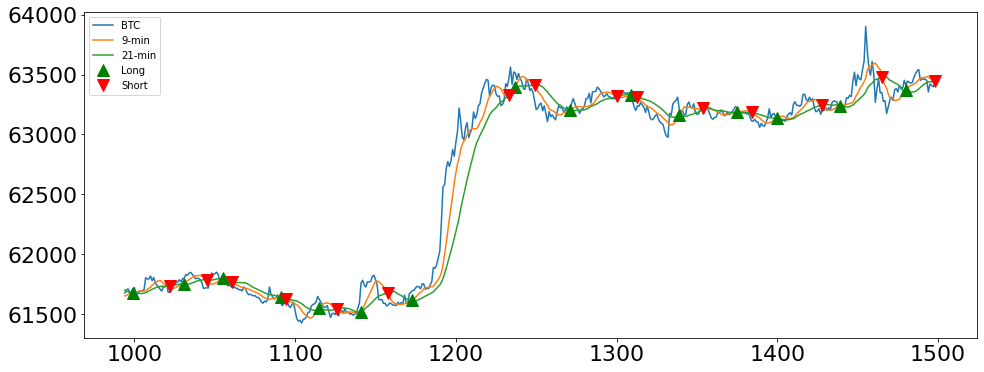

In [4]:
fig = plt.figure(facecolor=(1, 1, 1))
y = df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
        color = "g", markersize = 12, label= "Long")
plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
        color = "r", markersize = 12, label="Short")
plt.legend(loc=2);
plt.savefig('../web/assets/trendPositions.png')

# Trend Algo Performance

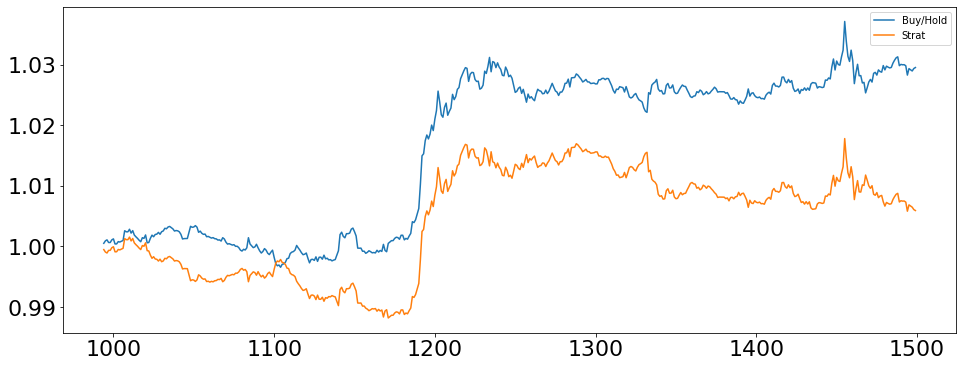

In [5]:
fig = plt.figure(facecolor=(1, 1, 1))
y=df2.iloc[-500:]['time']
df2['trend_returns'] = df2.signal * df2.market_returns
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(np.exp(df2.iloc[-500:]['market_returns']).cumprod(),label = "Buy/Hold")
plt.plot(np.exp(df2.iloc[-500:]['trend_returns']).cumprod(),label = "Strat")
plt.legend()
plt.savefig('../web/assets/trendRets.png')

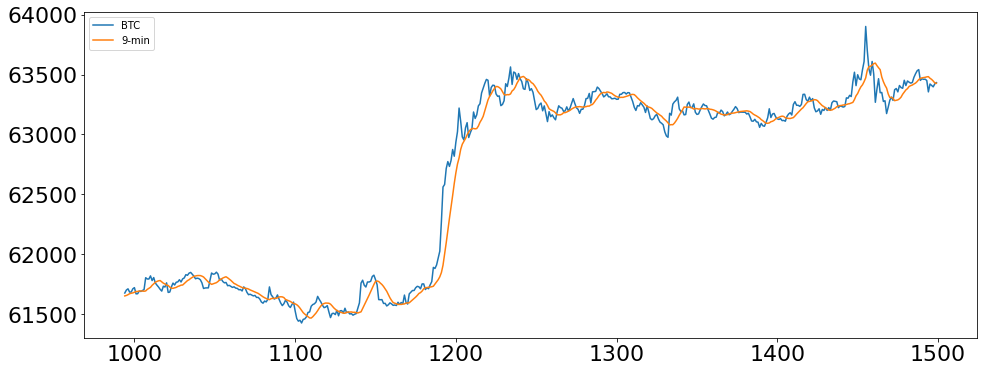

In [6]:
fig = plt.figure(facecolor=(1, 1, 1))
y=df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.legend(loc=2);
plt.savefig('../web/assets/btc1m9ma.png')

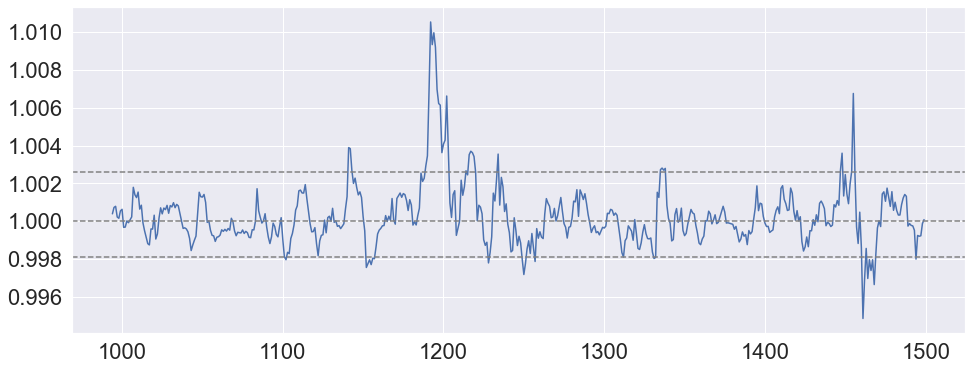

In [15]:
sb.set()
y = df2.iloc[-500:]['time']
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(df2['ratio'].dropna(), percentiles)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['ratio'].dropna())
plt.axhline(p[0], c=(.5, .5, .5), ls='--')
plt.axhline(p[2], c=(.5, .5, .5), ls='--')
plt.axhline(p[-1], c=(.5, .5, .5), ls='--')
plt.savefig('../web/assets/rangePercentiles.png')

# Range positions

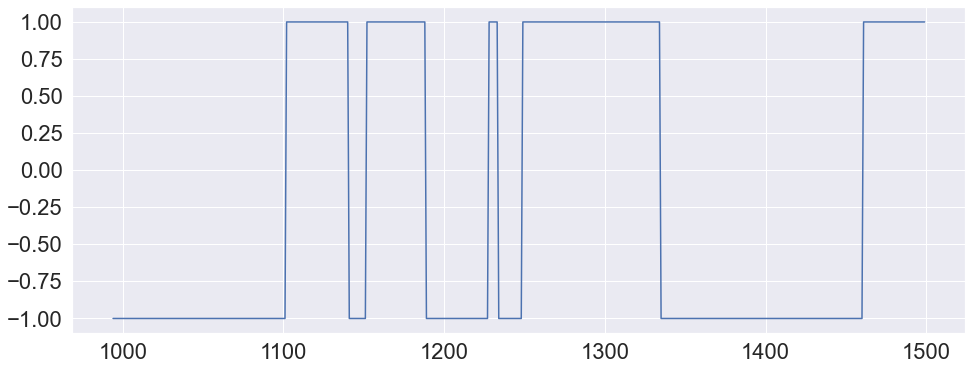

In [8]:
plt.rcParams['figure.figsize'] = [16.0, 6.0]

fig = plt.figure(facecolor=(1, 1, 1))
y=df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['position'].dropna())
plt.savefig('../web/assets/rangeStatus.png')


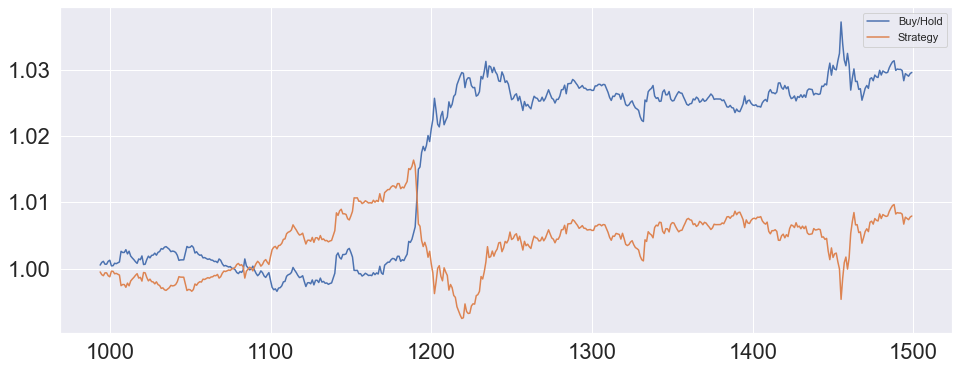

In [9]:
""" Plots returns for the range algo df thus returns 'R' """
y=df2.iloc[-500:]['time'].dropna()
fig = plt.figure(facecolor=(1, 1, 1))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(np.exp(df2.iloc[-500:]['market_returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df2.iloc[-500:]['range_returns'].dropna()).cumprod(), label='Strategy')
plt.legend();
plt.savefig('../web/assets/rangeRets.png')

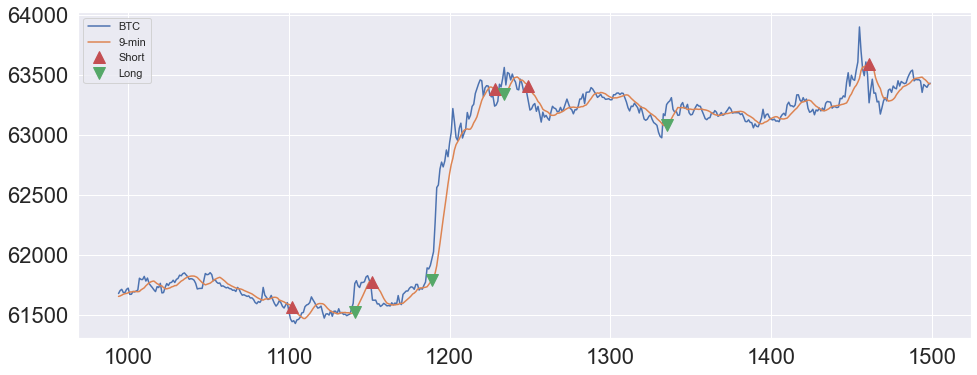

In [10]:
fig = plt.figure(facecolor=(1, 1, 1))

y=df2.iloc[-500:]['time']
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2[-500:].loc[df2.entryR == 2].index, df2[-500:]['9-min'][df2.entryR == 2], "^",
        color = "r", markersize = 12, label= "Short")
plt.plot(df2[-500:].loc[df2.entryR == -2].index, df2[-500:]['9-min'][df2.entryR == -2], "v",
        color = "g", markersize = 12, label="Long")
plt.legend(loc=2);
plt.savefig('../web/assets/dualPlot.png')


In [11]:
bestFit = df2[['time','close', 'market_returns','range_returns', 'trend_returns']]
bestFit.head(30)

,time,close,market_returns,range_returns,trend_returns
69,2021-11-01,61492.0,0.000146,0.000146,-0.000146
70,2021-11-01,61352.0,-0.002279,-0.002279,0.002279
71,2021-11-01,61439.0,0.001417,0.001417,-0.001417
72,2021-11-01,61493.0,0.000879,0.000879,-0.000879
73,2021-11-01,61517.0,0.000390,0.000390,-0.000390
74,2021-11-01,61589.0,0.001170,0.001170,-0.001170
75,2021-11-01,61567.0,-0.000357,-0.000357,0.000357
76,2021-11-01,61501.0,-0.001073,-0.001073,0.001073
77,2021-11-01,61454.0,-0.000765,-0.000765,0.000765
78,2021-11-01,61539.0,0.001382,0.001382,-0.001382


* check val in each algo_return, determine greatest val, declear winner
* if declared winner, iterate forward len(X_minutes) in winner col and append new val to list
* check both val at winning location for greatest val, decleare winner
* iterate forward len(X_min) in winning col and append val to list
* repeat, i think..

In [12]:
count=[]
selectVal = []
greatestVal = []
signal = ''
period = 3

for j, k in bestFit.iterrows():
    count.append(1)    
    if len(count) == period:
        selectVal.append(["time", k['market_returns'], "rangeRet", k['range_returns'], "trendRet", k['trend_returns']])
        if k['range_returns'] > k['trend_returns']:
            signal = -1
            greatestVal.append([ signal, k['range_returns']])
#             selectVal.append([k['range_returns'], signal])
#             np.insert(winnerVal, 1, greatestVal, axis = 1)
        elif k['range_returns'] < k['trend_returns']:
            signal = 1
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        else:
            k['range_returns'] == k['trend_returns']
            signal = 0
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        count = []

record=np.concatenate((selectVal,greatestVal), axis=1)
record

        
df3 = pd.DataFrame((record),
                     columns=['time', 'market_returns', 'range','rangeRet', 'trend', 'trendRet', 'winningAlgo', 'winnersRets'])   
df3.drop(['range', 'trend'], axis = 1, inplace=True)
record


array([['time', '0.00141704220273553', 'rangeRet', ...,
        '-0.00141704220273553', '-1.0', '0.00141704220273553'],
       ['time', '0.001169723786160759', 'rangeRet', ...,
        '-0.001169723786160759', '-1.0', '0.001169723786160759'],
       ['time', '-0.0007645073773190347', 'rangeRet', ...,
        '0.0007645073773190347', '1.0', '0.0007645073773190347'],
       ...,
       ['time', '1.5757833612184413e-05', 'rangeRet', ...,
        '1.5757833612184413e-05', '0.0', '1.5757833612184413e-05'],
       ['time', '0.0010412066315801383', 'rangeRet', ...,
        '0.0010412066315801383', '0.0', '0.0010412066315801383'],
       ['time', '0.0003942626944510863', 'rangeRet', ...,
        '-0.0003942626944510863', '-1.0', '0.0003942626944510863']],
      dtype='<U32')

In [13]:
df3['addTrend'] = df3['trendRet'].shift(-1)
df3['addRange'] = df3['rangeRet'].shift(-1)
df3['result'] = np.where(df3['trendRet'] > df3['rangeRet'], df3['addTrend'], np.nan)
df3['result'] = np.where(df3['trendRet'] < df3['rangeRet'], df3['addRange'], df3['result'])
df3['result'] = np.where(df3['trendRet'] == df3['rangeRet'], df3['addRange'], df3['result'])
df3

,time,market_returns,rangeRet,trendRet,winningAlgo,winnersRets,addTrend,addRange,result
0,time,0.00141704220273553,0.00141704220273553,-0.00141704220273553,-1.0,0.00141704220273553,-0.001169723786160759,0.001169723786160759,0.001169723786160759
1,time,0.001169723786160759,0.001169723786160759,-0.001169723786160759,-1.0,0.001169723786160759,0.0007645073773190347,-0.0007645073773190347,-0.0007645073773190347
2,time,-0.0007645073773190347,-0.0007645073773190347,0.0007645073773190347,1.0,0.0007645073773190347,-0.0003575666005879441,0.0003575666005879441,-0.0003575666005879441
3,time,0.0003575666005879441,0.0003575666005879441,-0.0003575666005879441,-1.0,0.0003575666005879441,-0.0007638612744340634,0.0007638612744340634,0.0007638612744340634
4,time,0.0007638612744340634,0.0007638612744340634,-0.0007638612744340634,-1.0,0.0007638612744340634,-0.000959482278465984,0.000959482278465984,0.000959482278465984
...,...,...,...,...,...,...,...,...,...
467,time,0.0004725079232983376,0.0004725079232983376,0.0004725079232983376,0.0,0.0004725079232983376,-0.0014174123577532782,-0.0014174123577532782,-0.0014174123577532782
468,time,-0.0014174123577532782,-0.0014174123577532782,-0.0014174123577532782,0.0,-0.0014174123577532782,1.5757833612184413e-05,1.5757833612184413e-05,1.5757833612184413e-05
469,time,1.5757833612184413e-05,1.5757833612184413e-05,1.5757833612184413e-05,0.0,1.5757833612184413e-05,0.0010412066315801383,0.0010412066315801383,0.0010412066315801383
470,time,0.0010412066315801383,0.0010412066315801383,0.0010412066315801383,0.0,0.0010412066315801383,-0.0003942626944510863,0.0003942626944510863,0.0003942626944510863


NameError: name 'values' is not defined

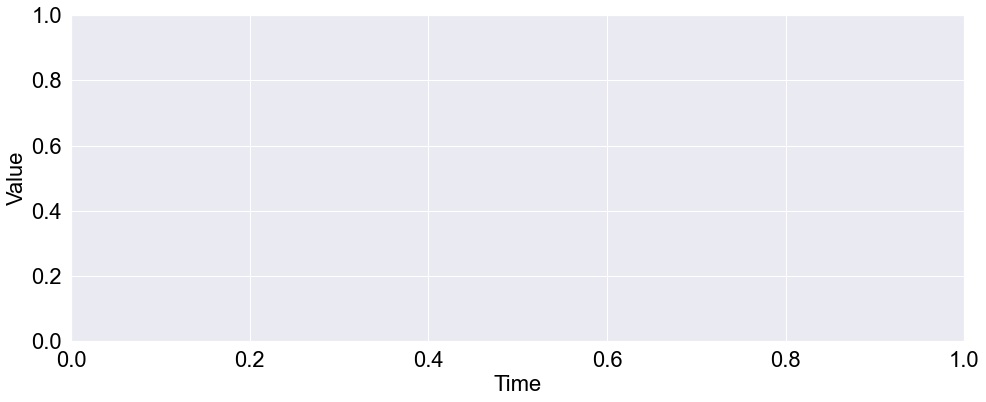

In [14]:
initial_capital = float(100000.0)

# Create df positions
positions = pd.DataFrame(index=df2.time.index).fillna(0.0)


# Buy 2 BTC
positions['BTC-PERP'] = 2*df['position']

# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)

# Store diff in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['time'] = df['time']
fig = plt.figure(facecolor=(1, 1, 1))
x = portfolio.iloc[-200:]['time']
y = portfolio.iloc[-200:]['total']
plt.xticks(fontsize=22, color="black")
plt.xlabel('Time', color='black',fontsize=22)
plt.yticks(fontsize=22, color='black')
plt.ylabel('Value', color='black',fontsize=22)
plt.plot(values,y)
# plt.savefig('../web/assets/portfolioStandings.png')
plt.show()